In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gendata = pd.read_csv('Generated promoters & Candidates.csv')
natdata = pd.read_csv('PCC6803 Promoter and reads 100bp.csv')

In [3]:
gendata.head()

,Promoter_no,Promoter
0,1,TTTAAAAATTATCGACAATTTTGCCAAAATTTTGGAAAAATTGGCA...
1,2,TTTAAAAATTTTGAAAAATTTTGCAAAATTTTCGAAAATTTTGGCA...
2,3,TTTAAAATAATAACAATATTGACAATAATGGCGATAATTATGACAA...
3,4,TTTAATATAATTTTAATTATTATTATCATTATTATTGTTATTATTG...
4,5,ACAACGATGATAATAATGTTGACAATAATGACGACAATAATGGCGA...


In [4]:
gendata.shape

(10000, 2)

In [5]:
natdata.head(30)

,Promoter,Reads
0,CACCTCCAAATTATCTAAGTTAGCCAAATACCAAGAAGATTGGGCA...,106
1,TTTTGGGGAAACCGGCCGGGTCAGATTTAATCAGCGGCAACATCAC...,643
2,CCAAACGATGCTGAAGTTTACCGTTGCTGGTGAGCAGCAATAGTCC...,372
3,CAGCAACTCTTAACGGGAAATCCCAATGGTCCCTGGCAGAAAAAAT...,834
4,CCTGAATATCTCCAGGGTTATACCGCCCCCGATGAAGCTTTTGTTT...,1496
5,TGAGAATTTTGCCAAGTTTAGGTAAAATTTTTGGGGCATTTTTCCT...,802
6,ACCCATTTTTGCTTCCAACGGCTGGCAATTTATCAAACTGTATTTG...,1873
7,TACTGCAAAAAGTTCCGTTTGCAACAAAACACGTAACAGTTTGTAA...,48480
8,CCAGCAAATATCCACTGGAACGCTAAAGCCGCAATCGTTGCTCACC...,2003
9,AATAGTCGGGCATACAATTATGATCCATATACCTAATACTTATTGA...,1742


In [6]:
natdata.shape

(3712, 2)

In [7]:
gen_promoter = gendata['Promoter'].tolist()
nat_promoter = natdata['Promoter'].tolist()

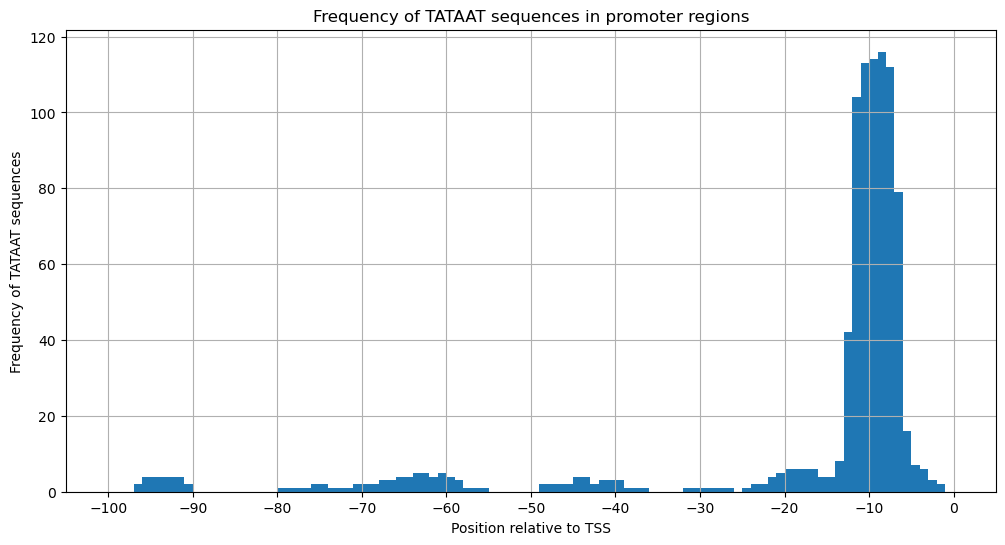

In [18]:
position_counts = [0] * 100
pattern = 'TATAAT'

for p in nat_promoter:
    matches = re.finditer(pattern, p)
    for match in matches:
        start = match.start() - 100  # Convert to position relative to TSS
        end = match.end() - 100
        for i in range(start, end):
            if -100 <= i < 0:  # Ensure the position is within the valid range
                position_counts[i + 100] += 1  # Shift to 0-based index for the list

# Create a histogram plot
plt.figure(figsize=(12, 6))
plt.bar(range(-100, 0), position_counts, width=1.0, align='edge')
plt.xlabel('Position relative to TSS')
plt.ylabel('Frequency of TATAAT sequences')
plt.title('Frequency of TATAAT sequences in promoter regions')
plt.xticks(range(-100,1,10))
plt.grid(True)
plt.show()

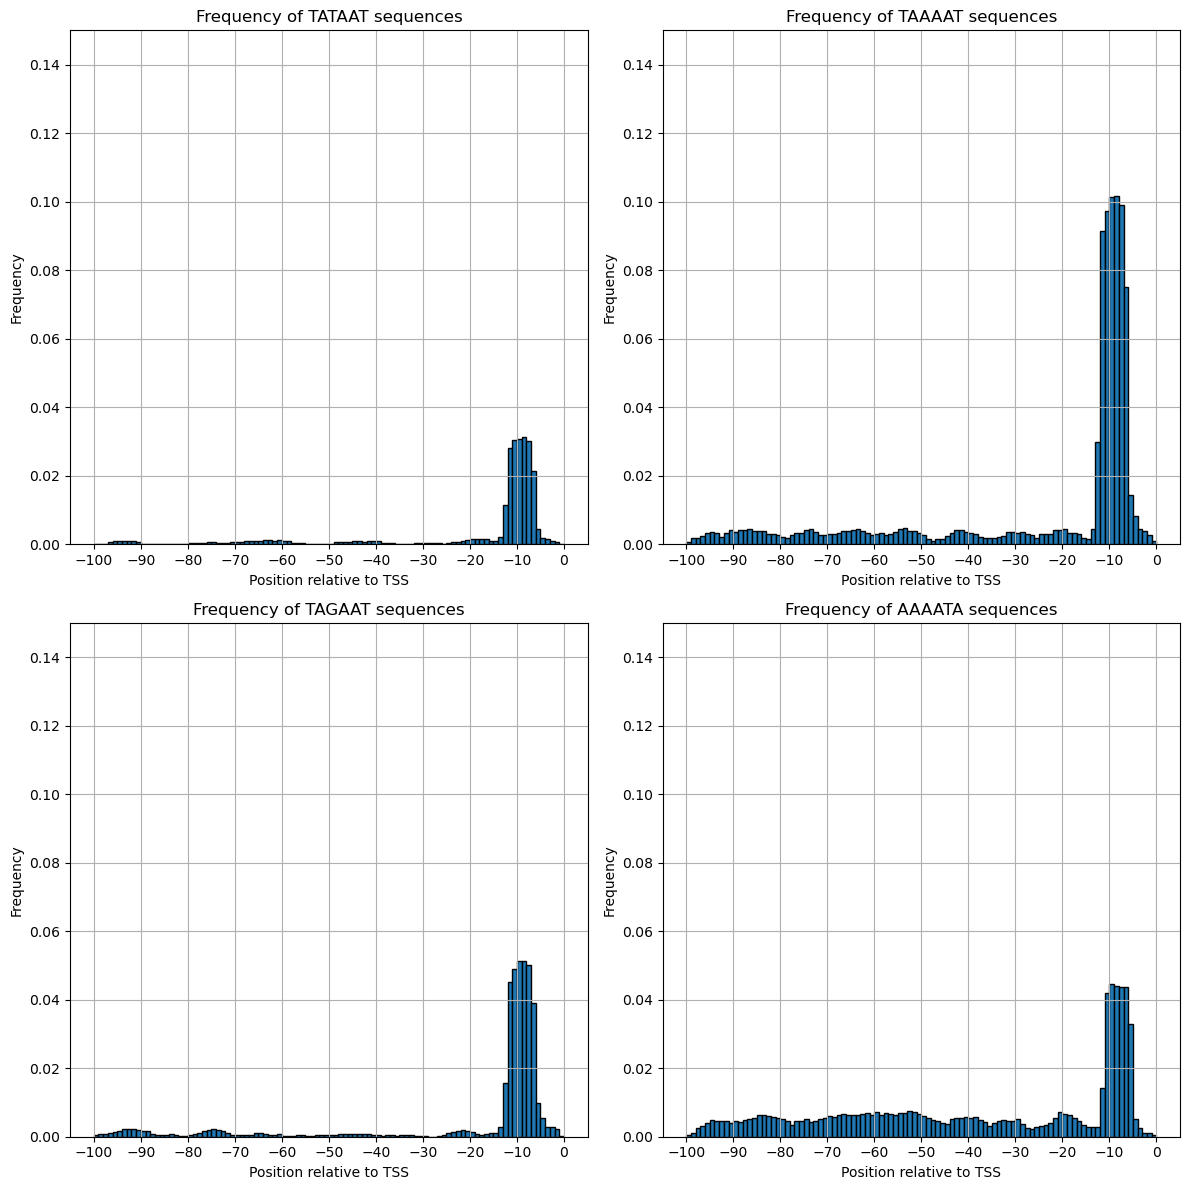

In [40]:
patterns = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA']  # List of different patterns to search for

# Create subplots
fig, axs = plt.subplots(2,2, figsize=(12, 12))  # 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for idx, pattern in enumerate(patterns):
    position_counts = [0] * 100  # Initialize a list to hold the counts for each position from -100 to 0

    for p in nat_promoter:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts[i + 100] += 1  # Shift to 0-based index for the list
                    
    normalized_counts = [(count / len(nat_promoter)) for count in position_counts]
    
    # Plot the histogram for the current pattern
    axs[idx].bar(range(-100, 0), normalized_counts, width=1.0, edgecolor='black', align='edge')
    axs[idx].set_xlabel('Position relative to TSS')
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_title(f'Frequency of {pattern} sequences')
    axs[idx].grid(True)
    axs[idx].set_ylim(0, 0.15)
    axs[idx].set_xticks(range(-100, 1, 10))

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

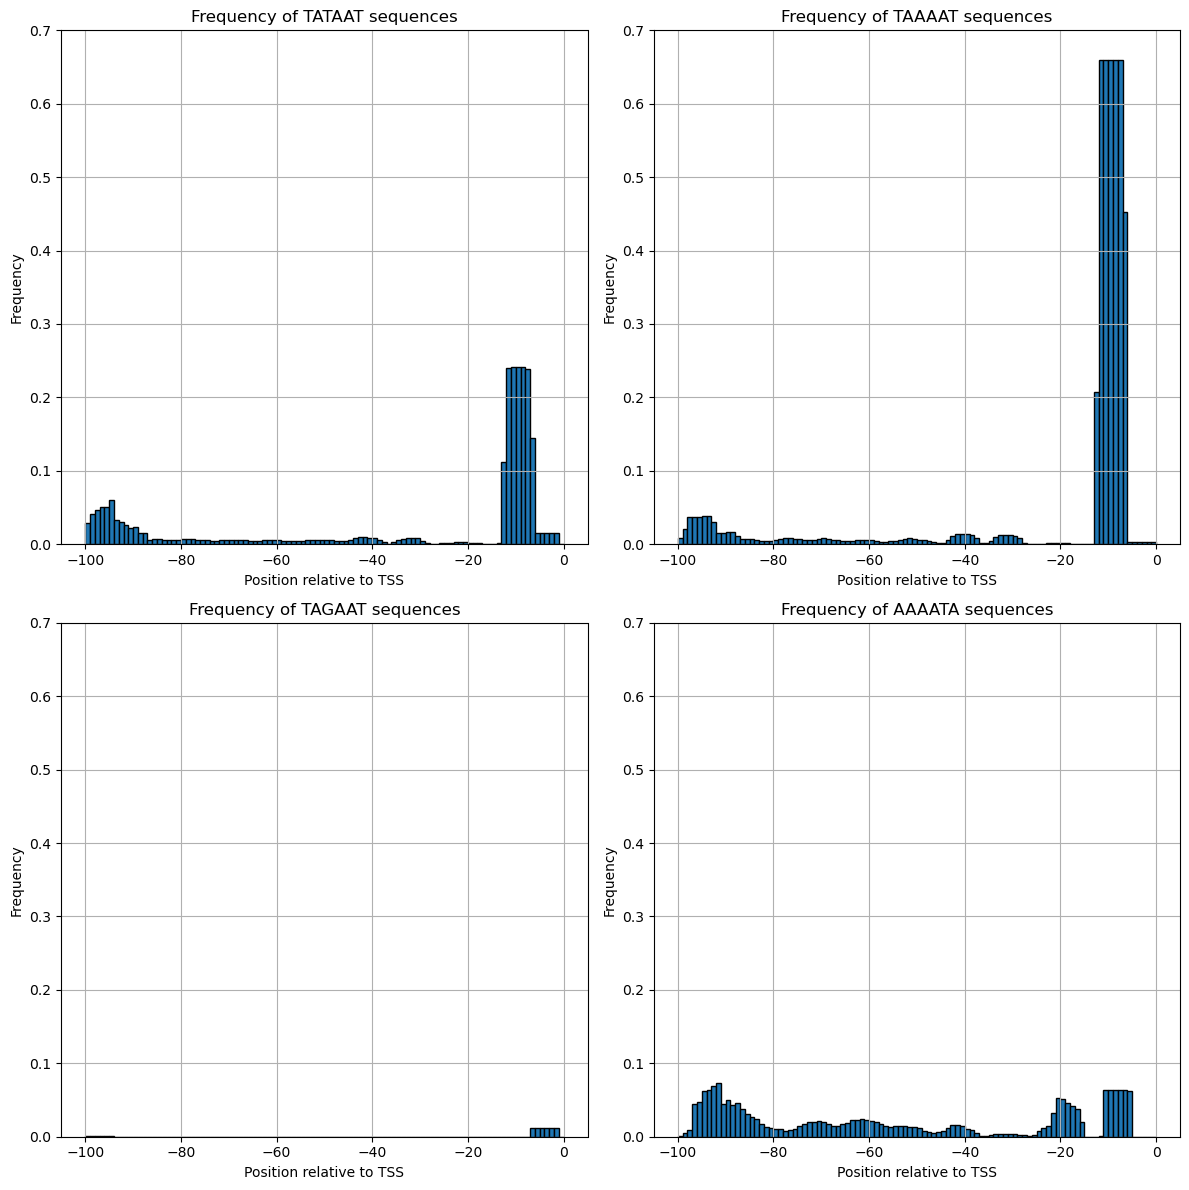

In [36]:
patterns = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA']  # List of different patterns to search for

# Create subplots
fig, axs = plt.subplots(2,2, figsize=(12, 12))  # 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for idx, pattern in enumerate(patterns):
    position_counts = [0] * 100  # Initialize a list to hold the counts for each position from -100 to 0

    for p in gen_promoter:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts[i + 100] += 1  # Shift to 0-based index for the list
                    
    normalized_counts = [(count / len(gen_promoter)) for count in position_counts]
    
    # Plot the histogram for the current pattern
    axs[idx].bar(range(-100, 0), normalized_counts, width=1.0, edgecolor='black', align='edge')
    axs[idx].set_xlabel('Position relative to TSS')
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_title(f'Frequency of {pattern} sequences')
    axs[idx].grid(True)
    axs[idx].set_ylim(0, 0.7)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

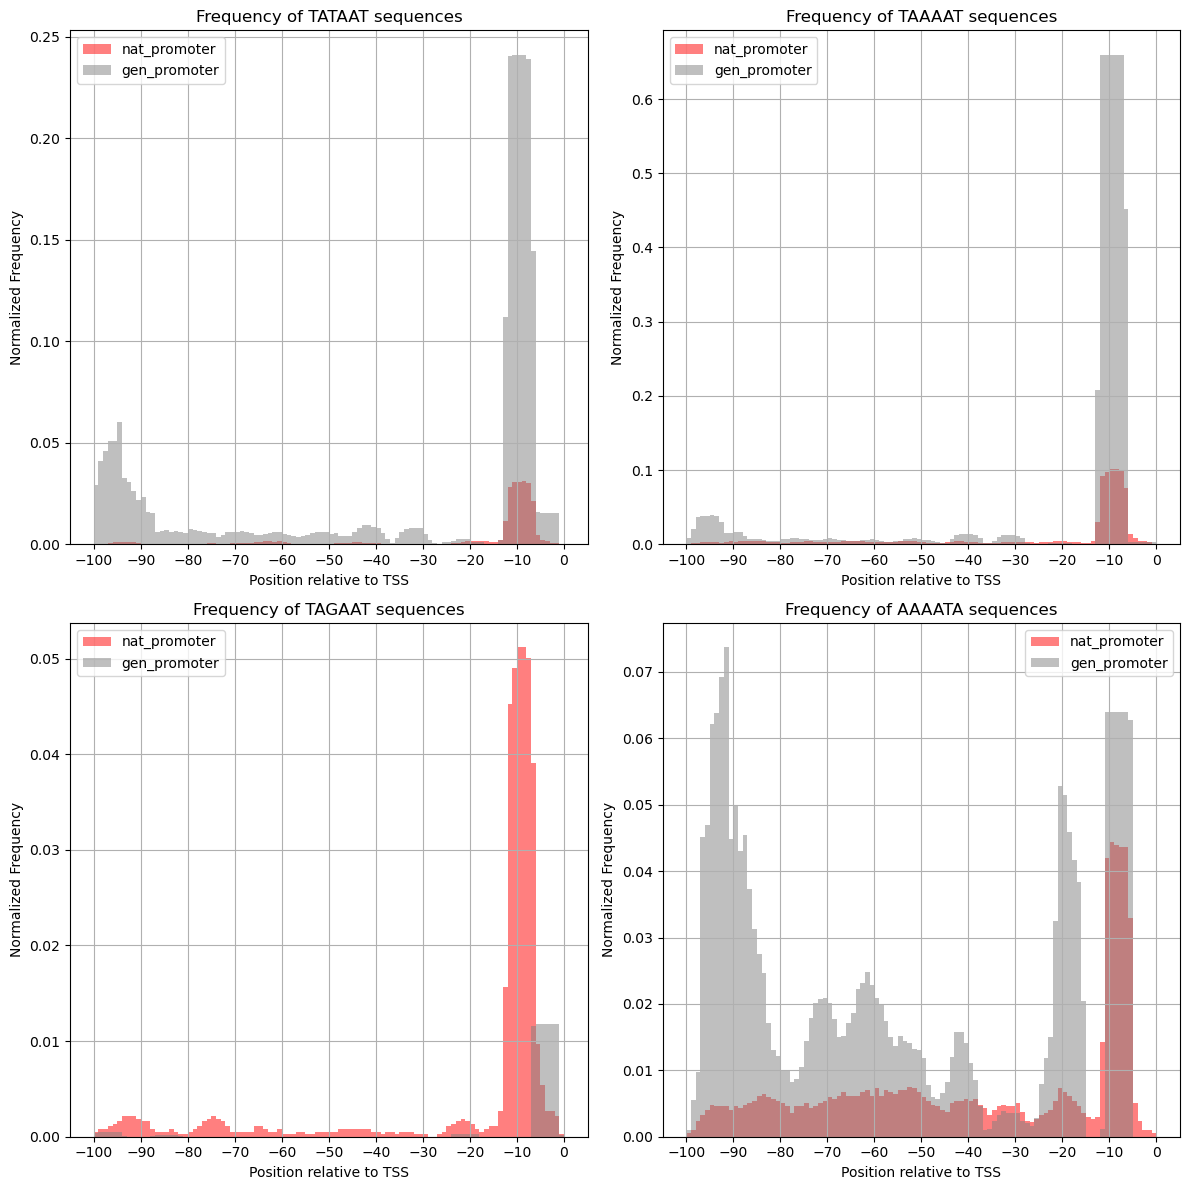

In [73]:
import re
import matplotlib.pyplot as plt

patterns = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA']  # List of different patterns to search for

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for idx, pattern in enumerate(patterns):
    position_counts_nat = [0] * 100  # Counts for nat_promoter
    position_counts_gen = [0] * 100  # Counts for gen_promoter

    # Count occurrences in nat_promoter
    for p in nat_promoter:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts_nat[i + 100] += 1/len(nat_promoter)  # Shift to 0-based index for the list

    # Count occurrences in gen_promoter
    for p in gen_promoter:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts_gen[i + 100] += 1/len(gen_promoter)  # Shift to 0-based index for the list

    # # Normalize the counts by the number of promoter sequences
    # normalized_counts_nat = [count / len(nat_promoter) for count in position_counts_nat]
    # normalized_counts_gen = [count / len(gen_promoter) for count in position_counts_gen]

    # Plot the histogram for the current pattern
    axs[idx].bar(range(-100, 0), position_counts_nat, width=1.0, color = 'red', align='edge', alpha=0.5, label='nat_promoter')
    axs[idx].bar(range(-100, 0), position_counts_gen, width=1.0, color='grey', align='edge', alpha=0.5, label='gen_promoter')
    axs[idx].set_xlabel('Position relative to TSS')
    axs[idx].set_ylabel('Normalized Frequency')
    axs[idx].set_title(f'Frequency of {pattern} sequences')
    axs[idx].grid(True)
    #axs[idx].set_ylim(0, 0.15)
    axs[idx].set_xticks(range(-100, 1, 10))
    axs[idx].legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


In [10]:
pcc7942 = pd.read_csv('final_7942promoter.csv')['0'].tolist()

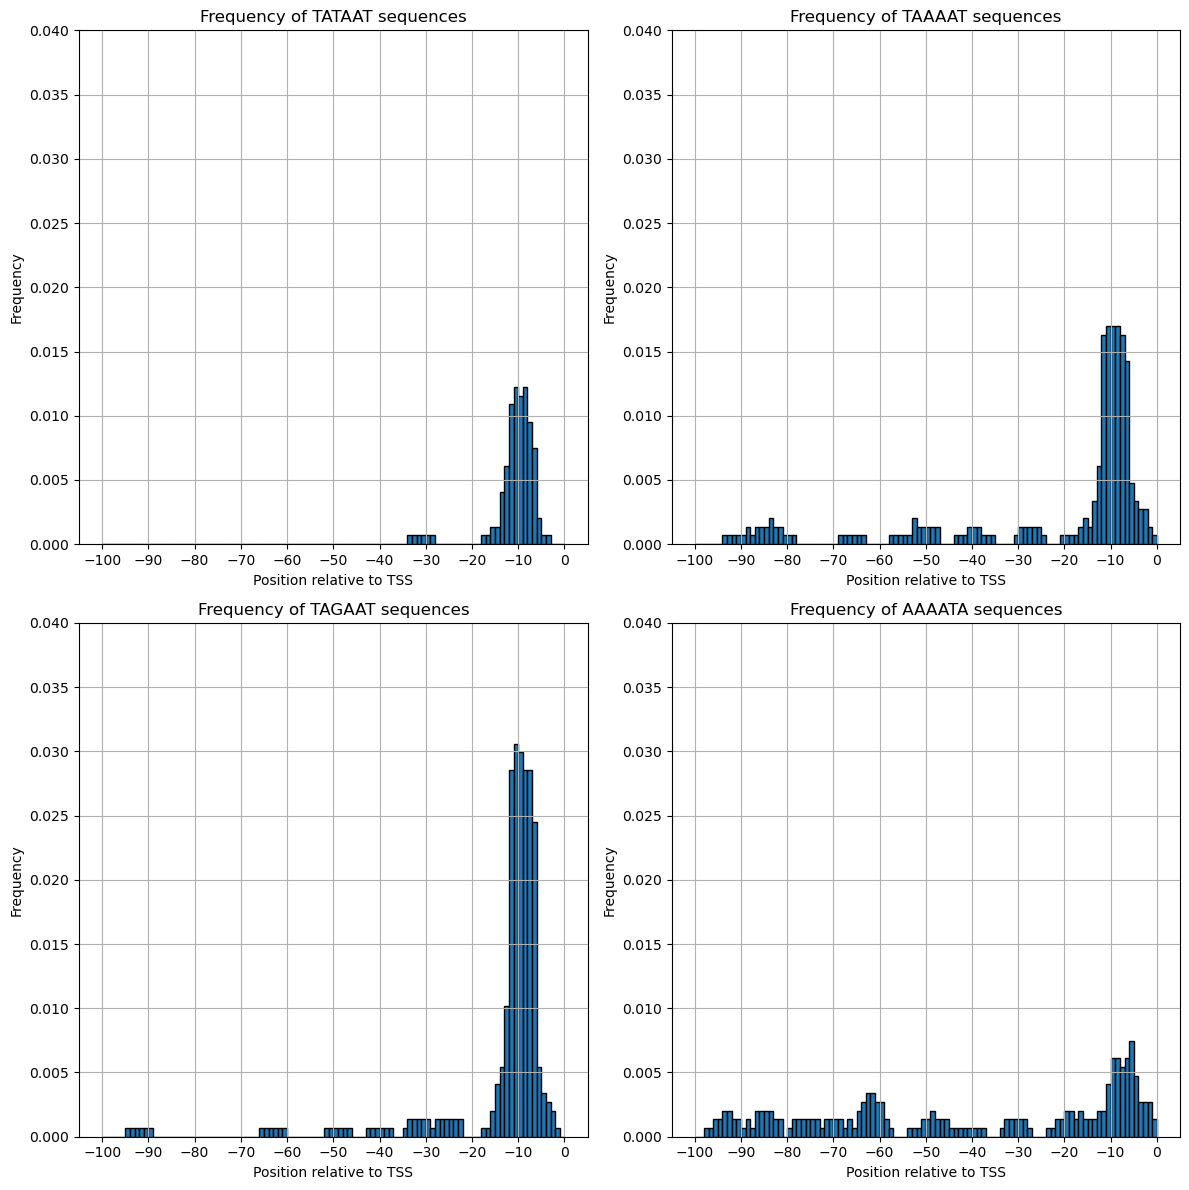

In [58]:
patterns = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA']  # List of different patterns to search for

# Create subplots
fig, axs = plt.subplots(2,2, figsize=(12, 12))  # 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for idx, pattern in enumerate(patterns):
    position_counts = [0] * 100  # Initialize a list to hold the counts for each position from -100 to 0

    for p in pcc7942:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts[i + 100] += 1 /len(pcc7942) # Shift to 0-based index for the list
    
    # Plot the histogram for the current pattern
    axs[idx].bar(range(-100, 0), position_counts, width=1.0, edgecolor='black', align='edge')
    axs[idx].set_xlabel('Position relative to TSS')
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_title(f'Frequency of {pattern} sequences')
    axs[idx].grid(True)
    axs[idx].set_ylim(0, 0.04)
    axs[idx].set_xticks(range(-100, 1, 10))

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

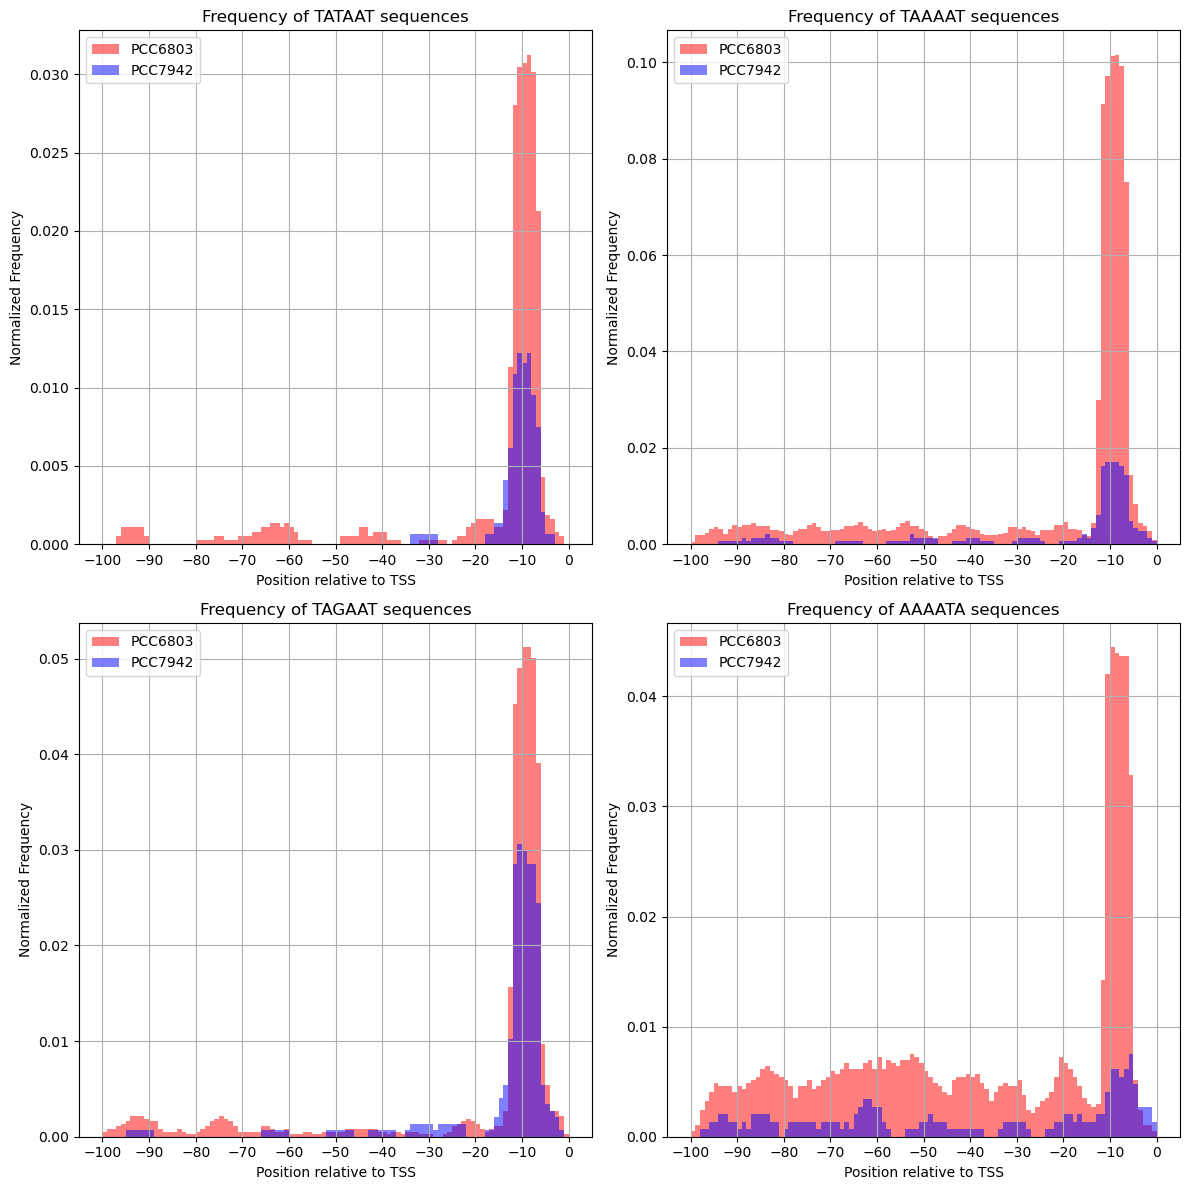

In [60]:
import re
import matplotlib.pyplot as plt

patterns = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA']  # List of different patterns to search for

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for idx, pattern in enumerate(patterns):
    position_counts_6803 = [0] * 100  # Counts for nat_promoter
    position_counts_7942 = [0] * 100  # Counts for gen_promoter

    # Count occurrences in nat_promoter
    for p in nat_promoter:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts_6803[i + 100] += 1/len(nat_promoter)  # Shift to 0-based index for the list

    # Count occurrences in gen_promoter
    for p in pcc7942:
        matches = re.finditer(pattern, p)
        for match in matches:
            start = match.start() - 100  # Convert to position relative to TSS
            end = match.end() - 100
            for i in range(start, end):
                if -100 <= i < 0:  # Ensure the position is within the valid range
                    position_counts_7942[i + 100] += 1/len(pcc7942)  # Shift to 0-based index for the list

    # Plot the histogram for the current pattern
    axs[idx].bar(range(-100, 0), position_counts_6803, width=1.0, color = 'red', align='edge', alpha=0.5, label='PCC6803')
    axs[idx].bar(range(-100, 0), position_counts_7942, width=1.0, color='blue', align='edge', alpha=0.5, label='PCC7942')
    axs[idx].set_xlabel('Position relative to TSS')
    axs[idx].set_ylabel('Normalized Frequency')
    axs[idx].set_title(f'Frequency of {pattern} sequences')
    axs[idx].grid(True)
    #axs[idx].set_ylim(0, 0.15)
    axs[idx].set_xticks(range(-100, 1, 10))
    axs[idx].legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


In [75]:
from collections import Counter

def sixmer_candidates(promoter_sequences, num):
    # Initialize a Counter to store counts for all 6-mers
    all_sixmers_counter = Counter()

    # Iterate over each promoter sequence
    for promoter in promoter_sequences:
        # Generate all possible 6-mers for the current promoter
        promoter_sixmers = [promoter[i:i+6] for i in range(len(promoter) - 5)]
        
        # Update the Counter with counts of 6-mers from the current promoter
        all_sixmers_counter.update(promoter_sixmers)

    # Get the top 'num' 6-mers and their frequencies
    top_sixmers = all_sixmers_counter.most_common(num)
    
    return top_sixmers

# Example usage:
pcc6803 = nat_promoter

num = 15  # Number of top 6-mers to retrieve

pcc6803_sixmers = sixmer_candidates(pcc6803, num)
pcc7942_sixmers = sixmer_candidates(pcc7942, num)

print("Top 15 6-mers in PCC6803 promoter sequences:")
for sixmer, count in pcc6803_sixmers:
    print(f"{sixmer}: {count}")

print("\nTop 15 6-mers in PCC7942 promoter sequences:")
for sixmer, count in pcc7942_sixmers:
    print(f"{sixmer}: {count}")


Top 15 6-mers in PCC6803 promoter sequences:
AAAATT: 669
TAAAAT: 556
AATTTT: 540
AAAAAT: 517
AAATTT: 515
GGCGAT: 506
CGATCG: 500
AAAAAA: 499
ATTTTT: 486
GCGATC: 474
ATCGCC: 465
TTTTTT: 465
GATCGC: 446
AAAATA: 443
TTTTTG: 422

Top 15 6-mers in PCC7942 promoter sequences:
CGATCG: 728
GCGATC: 661
GATCGC: 643
GGCGAT: 246
ATCGCC: 245
ATCGCT: 229
AGCGAT: 199
CGCGAT: 187
ATCGCG: 167
TGCGAT: 155
ATCGCA: 155
CAGCAG: 133
TCGCTG: 127
TCGCCC: 120
CTGCTG: 115


In [12]:
from collections import Counter

def sixmer_candidates(promoter_sequences, num):
    # Initialize a Counter to store counts for all 6-mers
    all_sixmers_counter = Counter()

    # Iterate over each promoter sequence
    for promoter in promoter_sequences:
        # Determine the start position for the upstream -40 region
        start_position = max(len(promoter) - 16, 0)
        
        # Generate all possible 6-mers for the upstream -40 region
        promoter_sixmers = [promoter[i:i+6] for i in range(start_position, len(promoter) - 5)]
        
        # Update the Counter with counts of 6-mers from the upstream -40 region of the current promoter
        all_sixmers_counter.update(promoter_sixmers)

    # Get the top 'num' 6-mers and their frequencies
    top_sixmers = all_sixmers_counter.most_common(num)
    
    return top_sixmers

# Example usage:
pcc6803 = nat_promoter

num = 6  # Number of top 6-mers to retrieve

pcc6803_sixmers = sixmer_candidates(pcc6803, num)
pcc7942_sixmers = sixmer_candidates(pcc7942, num)

print("Top 6 6-mers in PCC6803 \npromoter sequences:\n")
for sixmer, count in pcc6803_sixmers:
    print(f"{sixmer}: {count}")

print("\nTop 6 6-mers in PCC7942 \npromoter sequences:\n")
for sixmer, count in pcc7942_sixmers:
    print(f"{sixmer}: {count}")


Top 6 6-mers in PCC6803 
promoter sequences:

TAAAAT: 393
TAGAAT: 202
AAAATA: 177
TTAAAA: 164
AAAATT: 164
TACAAT: 151

Top 6 6-mers in PCC7942 
promoter sequences:

TAGGAT: 54
TAGAAT: 50
TAAGAT: 38
CGATCG: 36
GATCGC: 35
AGAATA: 34


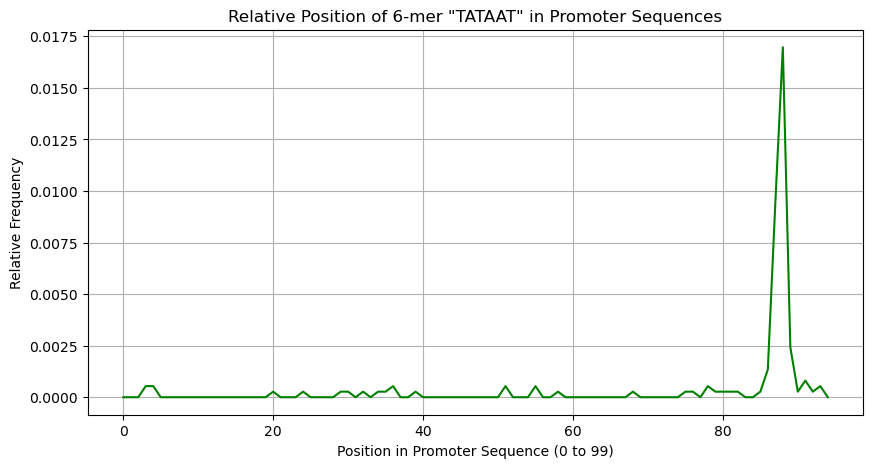

In [10]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# Function to calculate 6-mer frequencies at each position
def calculate_6mer_frequencies(sequences):
    position_frequencies = defaultdict(Counter)
    for seq in sequences:
        for i in range(len(seq) - 5):
            kmer = seq[i:i+6]
            position_frequencies[i][kmer] += 1
    return position_frequencies

# Calculate 6-mer frequencies
position_frequencies = calculate_6mer_frequencies(nat_promoter)

# Normalize frequencies to get relative frequencies
total_sequences = len(nat_promoter)
relative_frequencies = {pos: {kmer: count / total_sequences for kmer, count in freqs.items()} 
                        for pos, freqs in position_frequencies.items()}

# Choose a 6-mer to plot (for example: 'GACTGA')
selected_kmer = 'TATAAT'
positions = sorted(relative_frequencies.keys())
frequencies = [relative_frequencies[pos].get(selected_kmer, 0) for pos in positions]

# Plotting the relative frequencies of the selected 6-mer
plt.figure(figsize=(10, 5))
plt.plot(positions, frequencies, color='g')
plt.title(f'Relative Position of 6-mer "{selected_kmer}" in Promoter Sequences')
plt.xlabel('Position in Promoter Sequence (0 to 99)')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.show()


For TATAAT: Peak index for pcc6803 is 0 and for pcc7942 is 0
For TAAAAT: Peak index for pcc6803 is 0 and for pcc7942 is 0
For TAGAAT: Peak index for pcc6803 is 0 and for pcc7942 is 0
For AAAATA: Peak index for pcc6803 is 0 and for pcc7942 is 0


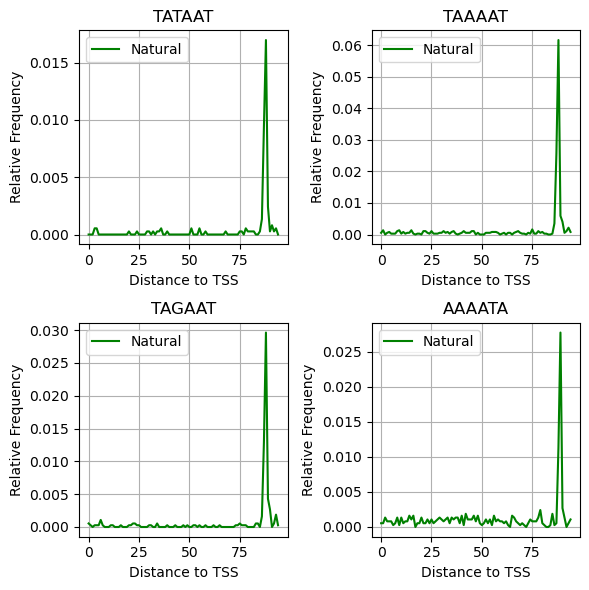

In [8]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# Function to calculate 6-mer frequencies at each position
def calculate_6mer_frequencies(sequences):
    position_frequencies = defaultdict(Counter)
    for seq in sequences:
        for i in range(len(seq) - 5):
            kmer = seq[i:i+6]
            position_frequencies[i][kmer] += 1
    return position_frequencies

# Calculate 6-mer frequencies for both sets of sequences
nat_position_frequencies = calculate_6mer_frequencies(nat_promoter)
gen_position_frequencies = calculate_6mer_frequencies(gen_promoter)

# Normalize frequencies to get relative frequencies
def normalize_frequencies(position_frequencies, total_sequences):
    return {pos: {kmer: count / total_sequences for kmer, count in freqs.items()} 
            for pos, freqs in position_frequencies.items()}

total_nat_sequences = len(nat_promoter)
total_gen_sequences = len(gen_promoter)

nat_relative_frequencies = normalize_frequencies(nat_position_frequencies, total_nat_sequences)
gen_relative_frequencies = normalize_frequencies(gen_position_frequencies, total_gen_sequences)

# List of k-mers to plot
kmers_to_plot = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA']  # Add more 6-mers as needed

# Plotting the relative frequencies of each selected 6-mer
plt.figure(figsize=(6, 6))

for i, kmer in enumerate(kmers_to_plot):
    positions = sorted(nat_relative_frequencies.keys())
    nat_frequencies = [nat_relative_frequencies[pos].get(kmer, 0) for pos in positions]
    gen_frequencies = [gen_relative_frequencies[pos].get(kmer, 0) for pos in positions]

    plt.subplot(2,2, i + 1)
    plt.plot(positions, nat_frequencies, color='g', label='Natural')
    #plt.plot(positions, gen_frequencies, color='y', label='Generated')
    plt.title(f'{kmer}')
    plt.xlabel('Distance to TSS')
    plt.ylabel('Relative Frequency')
    plt.legend()
    plt.grid(True)

    # Find index of peak value
    nat_peak_index = np.argmax(nat_relative_frequencies)
    gen_peak_index = np.argmax(gen_relative_frequencies)
    print(f"For {kmer}: Peak index for pcc6803 is {positions[nat_peak_index]} and for pcc7942 is {positions[gen_peak_index]}")

plt.tight_layout()
plt.show()


For TATAAT: Peak index for pcc6803 is 88 and for pcc7942 is 88
For TAAAAT: Peak index for pcc6803 is 88 and for pcc7942 is 88
For TAGAAT: Peak index for pcc6803 is 88 and for pcc7942 is 88
For AAAATA: Peak index for pcc6803 is 89 and for pcc7942 is 89


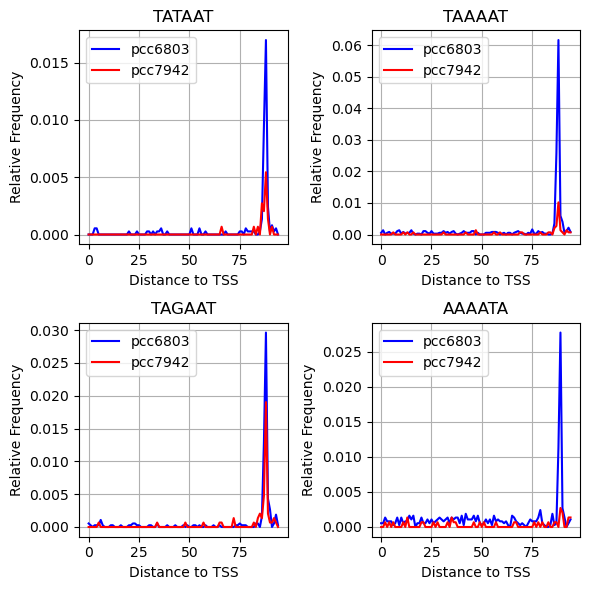

In [12]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# Function to calculate 6-mer frequencies at each position
def calculate_6mer_frequencies(sequences):
    position_frequencies = defaultdict(Counter)
    for seq in sequences:
        for i in range(len(seq) - 5):
            kmer = seq[i:i+6]
            position_frequencies[i][kmer] += 1
    return position_frequencies

# Calculate 6-mer frequencies for both sets of sequences
nat_position_frequencies = calculate_6mer_frequencies(nat_promoter)
pcc7942_position_frequencies = calculate_6mer_frequencies(pcc7942)

# Normalize frequencies to get relative frequencies
def normalize_frequencies(position_frequencies, total_sequences):
    return {pos: {kmer: count / total_sequences for kmer, count in freqs.items()} 
            for pos, freqs in position_frequencies.items()}

total_nat_sequences = len(nat_promoter)
total_pcc7942_sequences = len(pcc7942)

nat_relative_frequencies = normalize_frequencies(nat_position_frequencies, total_nat_sequences)
pcc7942_relative_frequencies = normalize_frequencies(pcc7942_position_frequencies, total_pcc7942_sequences)

# List of k-mers to plot
kmers_to_plot = ['TATAAT', 'TAAAAT', 'TAGAAT', 'AAAATA'] # Add more 6-mers as needed

# Plotting the relative frequencies of each selected 6-mer
plt.figure(figsize=(6, 6))

for i, kmer in enumerate(kmers_to_plot):
    positions = sorted(nat_relative_frequencies.keys())
    nat_frequencies = [nat_relative_frequencies[pos].get(kmer, 0) for pos in positions]
    pcc7942_frequencies = [pcc7942_relative_frequencies[pos].get(kmer, 0) for pos in positions]

    plt.subplot(2,2, i + 1)
    plt.plot(positions, nat_frequencies, color='b', label='pcc6803')
    plt.plot(positions, pcc7942_frequencies, color='r', label='pcc7942')
    plt.title(f'{kmer}')
    plt.xlabel('Distance to TSS')
    plt.ylabel('Relative Frequency')
    plt.legend()
    plt.grid(True)

    # Find index of peak value
    nat_peak_index = np.argmax(nat_frequencies)
    pcc7942_peak_index = np.argmax(pcc7942_frequencies)
    print(f"For {kmer}: Peak index for pcc6803 is {positions[nat_peak_index]} and for pcc7942 is {positions[pcc7942_peak_index]}")
    

plt.tight_layout()
plt.show()


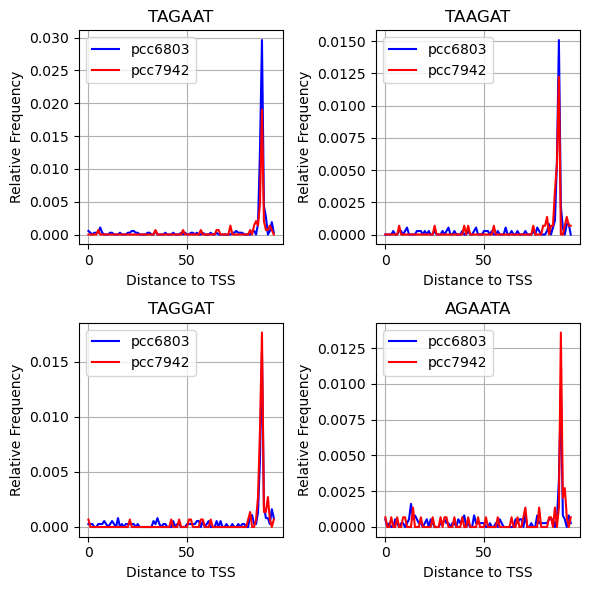

In [9]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# Function to calculate 6-mer frequencies at each position
def calculate_6mer_frequencies(sequences):
    position_frequencies = defaultdict(Counter)
    for seq in sequences:
        for i in range(len(seq) - 5):
            kmer = seq[i:i+6]
            position_frequencies[i][kmer] += 1
    return position_frequencies

# Calculate 6-mer frequencies for both sets of sequences
nat_position_frequencies = calculate_6mer_frequencies(nat_promoter)
pcc7942_position_frequencies = calculate_6mer_frequencies(pcc7942)

# Normalize frequencies to get relative frequencies
def normalize_frequencies(position_frequencies, total_sequences):
    return {pos: {kmer: count / total_sequences for kmer, count in freqs.items()} 
            for pos, freqs in position_frequencies.items()}

total_nat_sequences = len(nat_promoter)
total_pcc7942_sequences = len(pcc7942)

nat_relative_frequencies = normalize_frequencies(nat_position_frequencies, total_nat_sequences)
pcc7942_relative_frequencies = normalize_frequencies(pcc7942_position_frequencies, total_pcc7942_sequences)

# List of k-mers to plot
kmers_to_plot = ['TAGAAT','TAAGAT','TAGGAT', 'AGAATA']  # Add more 6-mers as needed

# Plotting the relative frequencies of each selected 6-mer
plt.figure(figsize=(6, 6))

for i, kmer in enumerate(kmers_to_plot):
    positions = sorted(nat_relative_frequencies.keys())
    nat_frequencies = [nat_relative_frequencies[pos].get(kmer, 0) for pos in positions]
    pcc7942_frequencies = [pcc7942_relative_frequencies[pos].get(kmer, 0) for pos in positions]

    plt.subplot(2,2, i + 1)
    plt.plot(positions, nat_frequencies, color='b', label='pcc6803')
    plt.plot(positions, pcc7942_frequencies, color='r', label='pcc7942')
    plt.title(f'{kmer}')
    plt.xlabel('Distance to TSS')
    plt.ylabel('Relative Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


For TAGAAT: Peak index for pcc6803 is 88 and for pcc7942 is 88
For TAAGAT: Peak index for pcc6803 is 88 and for pcc7942 is 88
For TAGGAT: Peak index for pcc6803 is 88 and for pcc7942 is 88
For AGAATA: Peak index for pcc6803 is 89 and for pcc7942 is 89


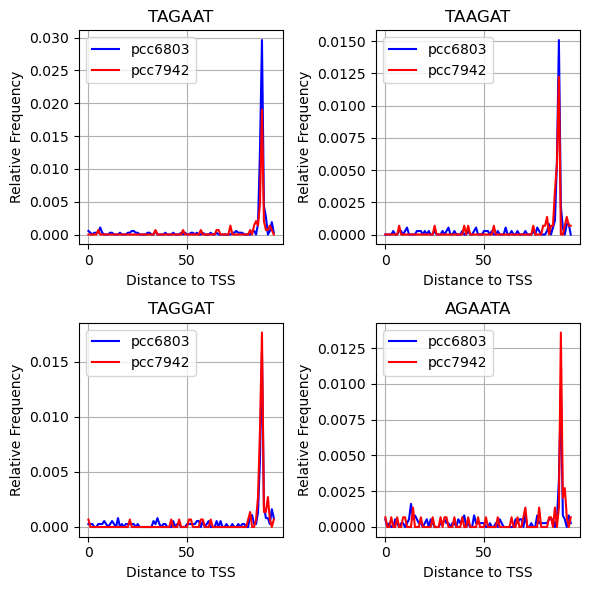

In [10]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# Function to calculate 6-mer frequencies at each position
def calculate_6mer_frequencies(sequences):
    position_frequencies = defaultdict(Counter)
    for seq in sequences:
        for i in range(len(seq) - 5):
            kmer = seq[i:i+6]
            position_frequencies[i][kmer] += 1
    return position_frequencies

# Calculate 6-mer frequencies for both sets of sequences
nat_position_frequencies = calculate_6mer_frequencies(nat_promoter)
pcc7942_position_frequencies = calculate_6mer_frequencies(pcc7942)

# Normalize frequencies to get relative frequencies
def normalize_frequencies(position_frequencies, total_sequences):
    return {pos: {kmer: count / total_sequences for kmer, count in freqs.items()} 
            for pos, freqs in position_frequencies.items()}

total_nat_sequences = len(nat_promoter)
total_pcc7942_sequences = len(pcc7942)

nat_relative_frequencies = normalize_frequencies(nat_position_frequencies, total_nat_sequences)
pcc7942_relative_frequencies = normalize_frequencies(pcc7942_position_frequencies, total_pcc7942_sequences)

# List of k-mers to plot
kmers_to_plot = ['TAGAAT','TAAGAT','TAGGAT', 'AGAATA']  # Add more 6-mers as needed

# Plotting the relative frequencies of each selected 6-mer
plt.figure(figsize=(6, 6))

for i, kmer in enumerate(kmers_to_plot):
    positions = sorted(nat_relative_frequencies.keys())
    nat_frequencies = [nat_relative_frequencies[pos].get(kmer, 0) for pos in positions]
    pcc7942_frequencies = [pcc7942_relative_frequencies[pos].get(kmer, 0) for pos in positions]

    plt.subplot(2,2, i + 1)
    plt.plot(positions, nat_frequencies, color='b', label='pcc6803')
    plt.plot(positions, pcc7942_frequencies, color='r', label='pcc7942')
    plt.title(f'{kmer}')
    plt.xlabel('Distance to TSS')
    plt.ylabel('Relative Frequency')
    plt.legend()
    plt.grid(True)

    # Find index of peak value
    nat_peak_index = np.argmax(nat_frequencies)
    pcc7942_peak_index = np.argmax(pcc7942_frequencies)
    print(f"For {kmer}: Peak index for pcc6803 is {positions[nat_peak_index]} and for pcc7942 is {positions[pcc7942_peak_index]}")

plt.tight_layout()
plt.show()
